In [2]:
# live_data_demo.ipynb

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# -------- 1. Pull Latest Data from Maryland Open Data Portal -----
url = "https://opendata.maryland.gov/resource/uxq4-6wxf.csv"

# Load only recent records to keep it light
df = pd.read_csv(url)

In [5]:
# -------- 2. Light Cleaning -----
# Convert numeric columns 
df["customers"] = pd.to_numeric(df["customers"], errors="coerce")
df["outages"] = pd.to_numeric(df["outages"], errors="coerce")

# Parse datetime
df["dt_stamp"] = pd.to_datetime(df["dt_stamp"], errors="coerce")

# Standardize county names
df["area"] = df["area"].str.strip().str.title()

# Compute percent_out
df["percent_out"] = (df["outages"] / df["customers"]) * 100

<function matplotlib.pyplot.show(close=None, block=None)>

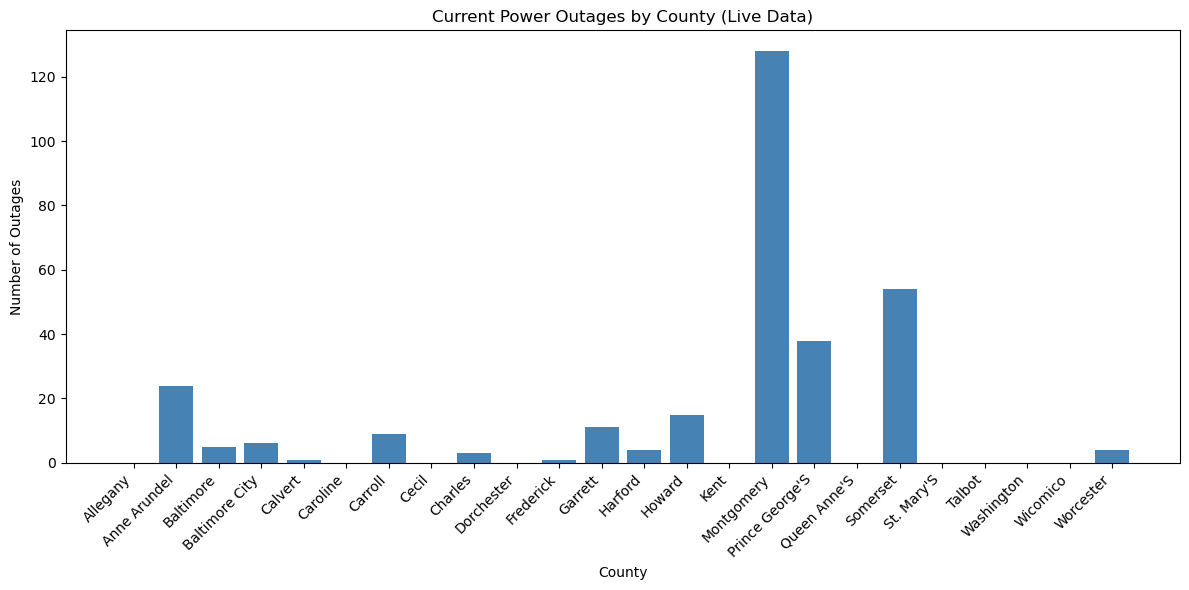

In [6]:
# ---- 3. Quick Visualization -----
current_snapshot = df.sort_values("dt_stamp").tail(24) # last 24 records
latest = current_snapshot.groupby("area")["outages"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(latest["area"], latest["outages"], color="steelblue")
plt.xticks(rotation=45, ha="right")
plt.title("Current Power Outages by County (Live Data)")
plt.xlabel("County")
plt.ylabel("Number of Outages")
plt.tight_layout()
plt.show